## Example of running DLGA on real PDE data (KdV equation)

### Visualization Checklist:
1. Training Process Visualization
   - 1.1 Training Loss Curve
   - 1.2 Validation Loss Curve
   - 1.3 Optimization Analysis (weights & diversity)
   - 1.4 Evolution Visualization

2. Solution Analysis
   - 2.1 PDE Solution Comparison
   - 2.2 Residual Analysis
   - 2.3 Time Slice Comparison

3. Equation Discovery Analysis
   - 3.1 Term Relationship Plot
   - 3.2 Metadata Plane Visualization
   - 3.3 Derivative Relationships

In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from pathlib import Path

# Add project root to Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
kd_main_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(kd_main_dir)

from kd.model.dlga import DLGA
from kd.viz.dlga_viz import *

## 1. Load and prepare data

In [2]:
# Load data from .mat file
data_path = os.path.join(kd_main_dir, "kd/dataset/data/KdV_equation.mat")
data = scipy.io.loadmat(data_path)

# Extract data arrays
t = data['tt'].flatten()  # Time points (201)
x = data['x'].flatten()   # Spatial points (512)
u = data['uu']           # Solution values (512 x 201)

# Create training dataset by sampling points
X_train = []
y_train = []

n_samples = 1000
t_idx = np.random.randint(0, t.shape[0], n_samples)  # Sample from 0 to 200
x_idx = np.random.randint(0, x.shape[0], n_samples)  # Sample from 0 to 511

for i, j in zip(t_idx, x_idx):
    X_train.append([x[j], t[i]])
    y_train.append(u[j,i])  # Note: u is (x, t) indexed

X_train = np.array(X_train)
y_train = np.array(y_train)

## 2. Model training

In [3]:
# Initialize model
model = DLGA(epi=0.2, input_dim=2)  # 2D input: (x,t)

# Train the model
print("\nTraining DLGA model...")
model.fit(X_train, y_train)


Training DLGA model...
===============train Net=================
iter_num: 500      loss: 0.00923746    loss_validate: 1.02536430
iter_num: 1000      loss: 0.00117118    loss_validate: 1.01657648
iter_num: 1500      loss: 0.00046397    loss_validate: 1.01421350
iter_num: 2000      loss: 0.00027619    loss_validate: 1.01355203
iter_num: 2500      loss: 0.00019678    loss_validate: 1.01446125
iter_num: 3000      loss: 0.00014097    loss_validate: 1.01421839
iter_num: 3500      loss: 0.00011052    loss_validate: 1.01550014
iter_num: 4000      loss: 0.00009602    loss_validate: 1.01532325
iter_num: 4500      loss: 0.00007298    loss_validate: 1.01495617
iter_num: 5000      loss: 0.00006360    loss_validate: 1.01553270
iter_num: 5500      loss: 0.00028772    loss_validate: 1.02099961
iter_num: 6000      loss: 0.00005684    loss_validate: 1.01526732
iter_num: 6500      loss: 0.00008273    loss_validate: 1.01410070
iter_num: 7000      loss: 0.00007290    loss_validate: 1.01694451
iter_num: 7

  2%|▏         | 2/100 [00:00<00:18,  5.38it/s]


New best solution found at generation 1
Improvement: 97.64%

Generation 0 stats:
Current best fitness: 3.1456
Global best fitness: 3.1456
Population size: 637
Unique modules: 74


  4%|▍         | 4/100 [00:00<00:16,  5.69it/s]


New best solution found at generation 3
Improvement: 13.59%

New best solution found at generation 4
Improvement: 3.74%


 12%|█▏        | 12/100 [00:02<00:15,  5.86it/s]


Generation 10 stats:
Current best fitness: 2.9885
Global best fitness: 2.9885
Population size: 573
Unique modules: 59


 18%|█▊        | 18/100 [00:03<00:13,  5.90it/s]


New best solution found at generation 17
Improvement: 49.55%


 21%|██        | 21/100 [00:03<00:13,  5.80it/s]


Generation 20 stats:
Current best fitness: 3.1456
Global best fitness: 1.5665
Population size: 599
Unique modules: 58


 32%|███▏      | 32/100 [00:05<00:14,  4.65it/s]


Generation 30 stats:
Current best fitness: 3.5876
Global best fitness: 1.5665
Population size: 592
Unique modules: 70


 42%|████▏     | 42/100 [00:07<00:11,  4.98it/s]


Generation 40 stats:
Current best fitness: 3.1456
Global best fitness: 1.5665
Population size: 572
Unique modules: 74


 46%|████▌     | 46/100 [00:08<00:10,  5.26it/s]


New best solution found at generation 45
Improvement: 60.99%


 52%|█████▏    | 52/100 [00:09<00:09,  5.01it/s]


Generation 50 stats:
Current best fitness: 3.1047
Global best fitness: 0.7669
Population size: 576
Unique modules: 71


 62%|██████▏   | 62/100 [00:11<00:07,  5.20it/s]


Generation 60 stats:
Current best fitness: 3.1047
Global best fitness: 0.7669
Population size: 555
Unique modules: 61


 72%|███████▏  | 72/100 [00:13<00:04,  5.70it/s]


Generation 70 stats:
Current best fitness: 3.1047
Global best fitness: 0.7669
Population size: 579
Unique modules: 64


 82%|████████▏ | 82/100 [00:15<00:03,  5.66it/s]


Generation 80 stats:
Current best fitness: 3.1047
Global best fitness: 0.7669
Population size: 576
Unique modules: 62


 92%|█████████▏| 92/100 [00:17<00:01,  5.45it/s]


Generation 90 stats:
Current best fitness: 2.9885
Global best fitness: 0.7669
Population size: 569
Unique modules: 68


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]



Final solution debug info:
Chromosome length: 1
Coefficient shape: (1, 1)
Chromosome: [[3, 3]]
Coefficients: [[-0.09933374]]

Debug convert_chrom_to_eq:
Chromosome length: 1
Coefficient shape: (1, 1)
Chromosome structure: [[3, 3]]
Coefficients: [[-0.09933374]]
Generated equation: u_t=-0.0993*uxxx*uxxx
equation form: u_t=-0.0993*uxxx*uxxx


## 3. Generate predictions

In [4]:
print("\nGenerating predictions...")

# Create full grid for visualization
xx, tt = np.meshgrid(x, t, indexing='ij')
X_full = np.hstack([xx.reshape(-1,1), tt.reshape(-1,1)])

# Convert to tensor and predict
X_tensor = torch.from_numpy(X_full.astype(np.float32)).to(model.device)
with torch.no_grad():
    u_pred = model.Net(X_tensor).cpu().numpy().reshape(u.shape)


Generating predictions...


## 4. Visualizations

Setting up the global plotting style

In [5]:
print("\nCreating visualizations...")

# Configure global plotting style
configure_plotting(cmap='viridis')


Creating visualizations...


### 1. Training Process Visualization
#### 1.1 Training Loss Curve

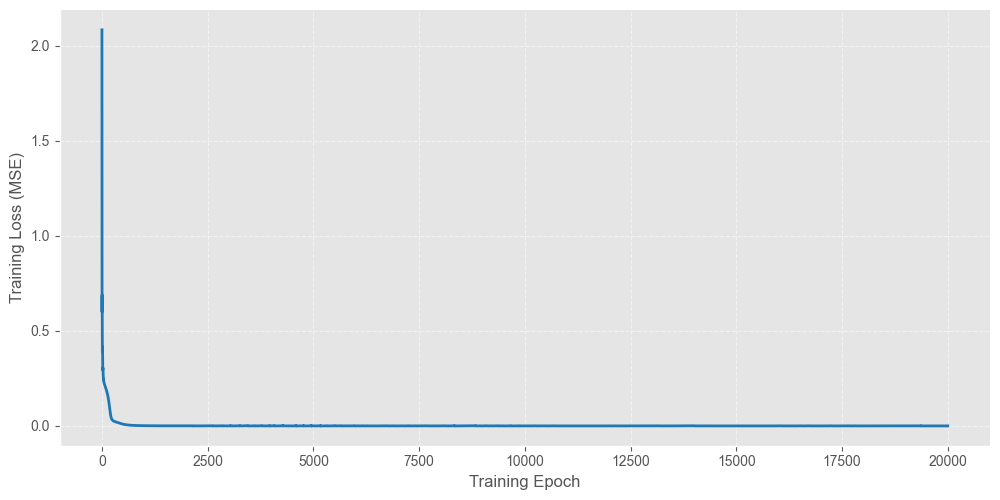

In [6]:
plot_training_loss(model)

#### 1.2 Validation Loss Curve

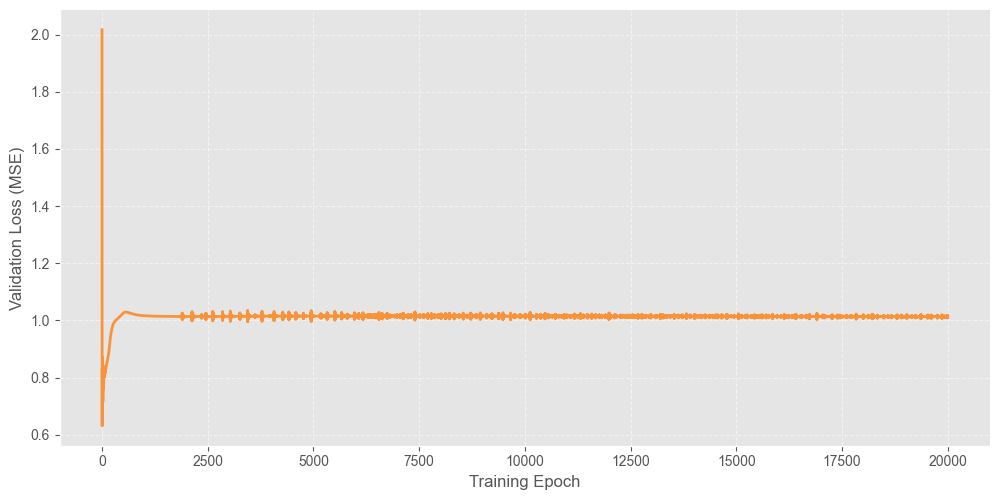

In [7]:
plot_validation_loss(model)

#### 1.3 Optimization Analysis (weights & diversity history)

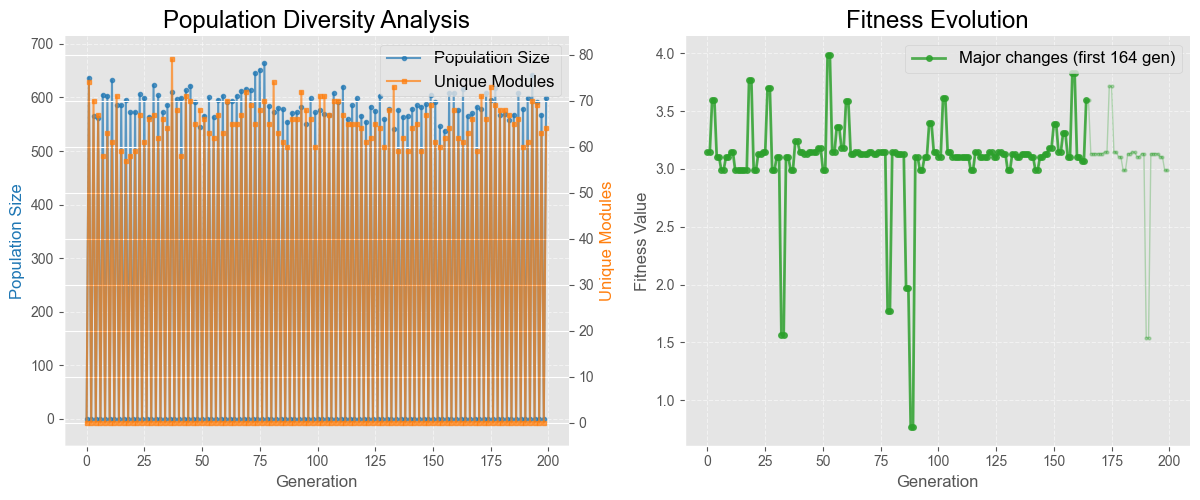


Optimization Analysis Summary:
Initial fitness: 3.1456
Final fitness: 2.9885
Major improvements occurred in first 164 generations
Improvement in major change period: -14.19%
Total improvement: 4.99%
Average population size: 294.1
Average unique modules: 32.7
Diversity ratio: 11.12%


In [8]:
plot_optimization_analysis(model)

#### 1.4 Evolution Visualization

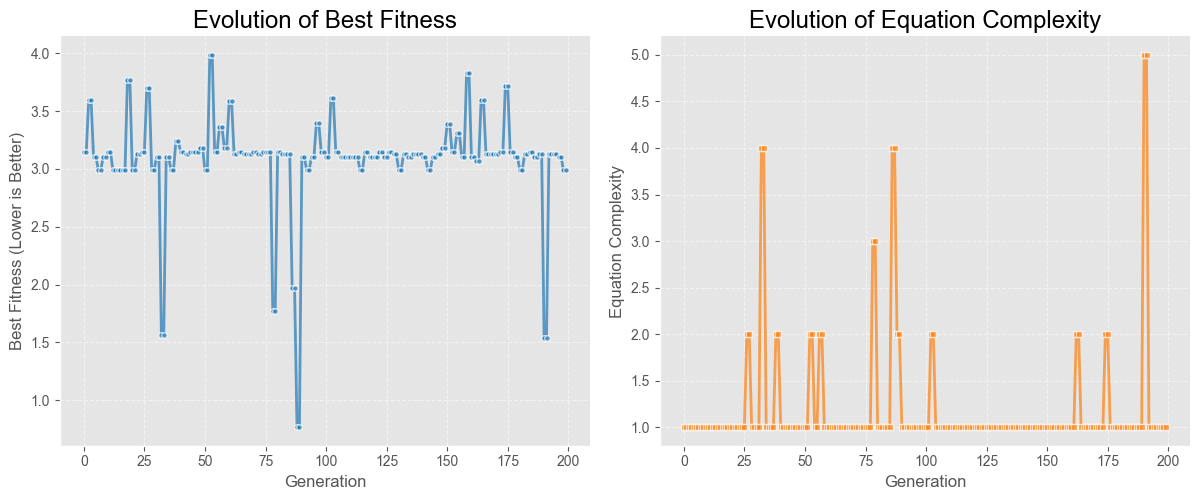


Evolution Analysis Summary:
Initial fitness: 3.1456
Final fitness: 2.9885
Improvement: 4.99%
Initial complexity: 1
Final complexity: 1


In [9]:
plot_evolution(model)

### 2. Solution Analysis
#### 2.1 PDE Solution Comparison

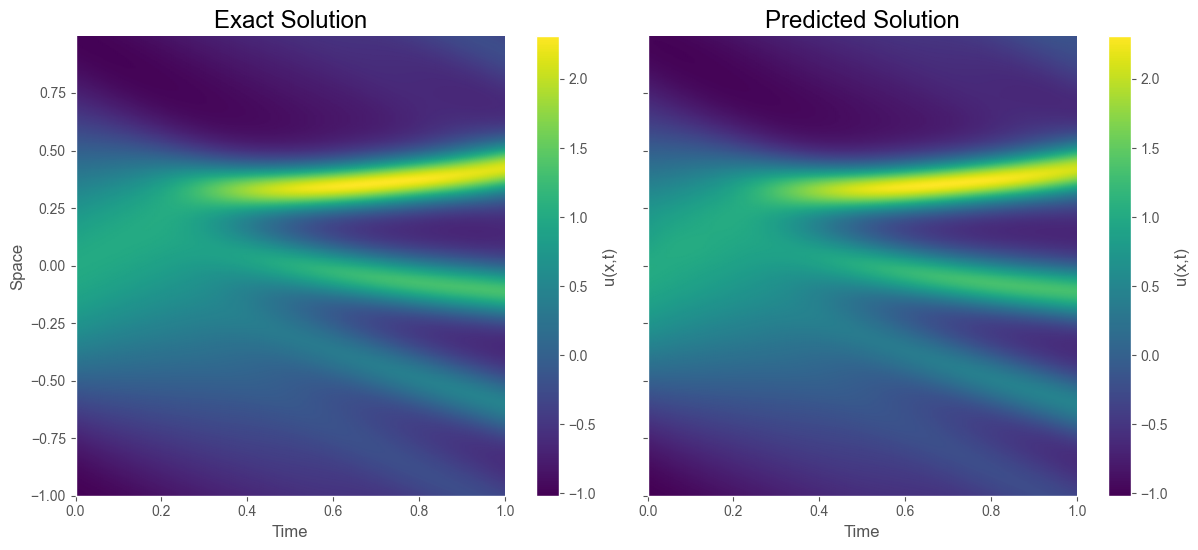

In [10]:
plot_pde_comparison(
    x=x,
    t=t,
    u_true=u,
    u_pred=u_pred
)

#### 2.2 Residual Analysis

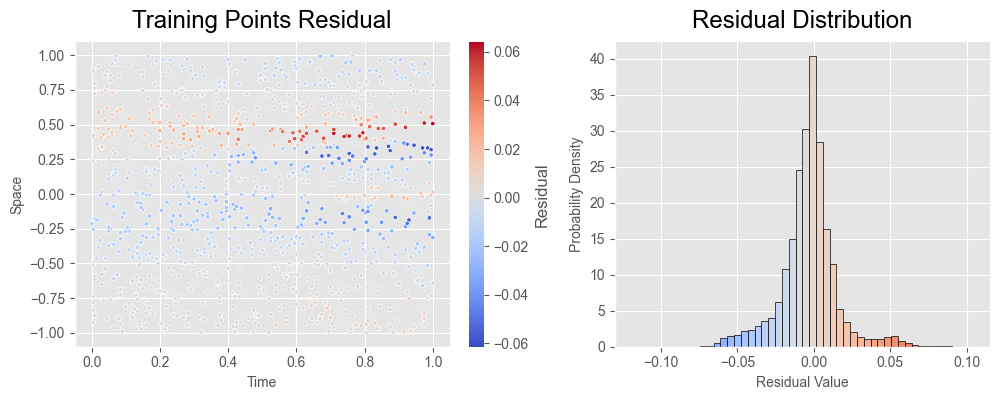

In [11]:
plot_residual_analysis(
    model=model,
    X_train=X_train,
    y_train=y_train,
    u_true=u,
    u_pred=u_pred,
)

#### 2.3 Time Slice Comparison

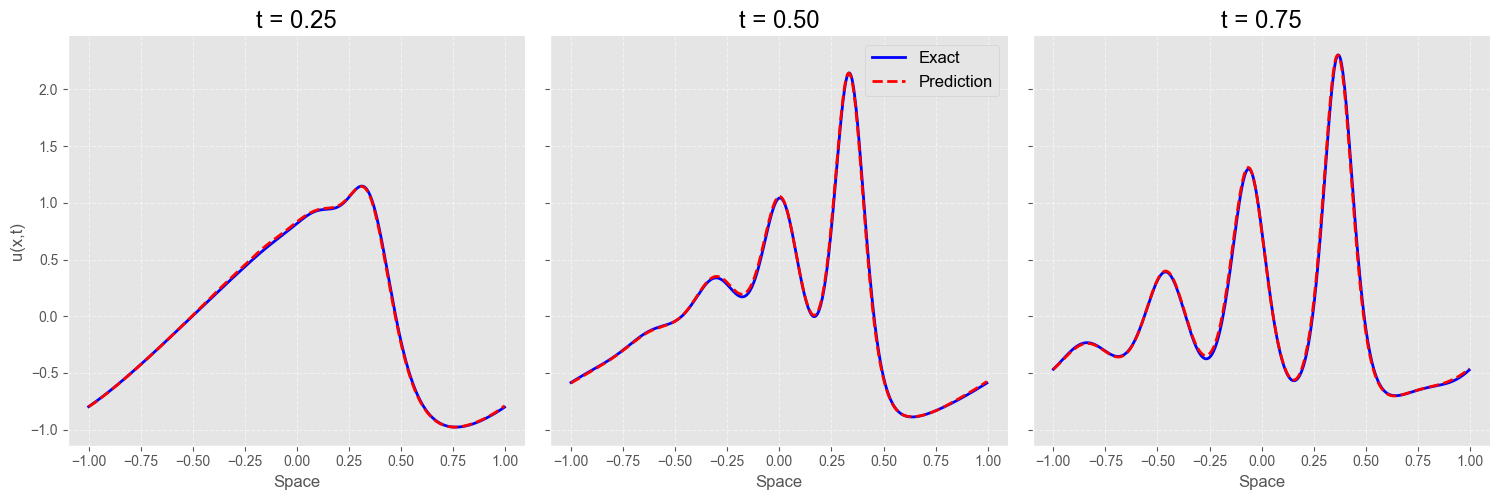

In [12]:
plot_time_slices(
    x=x,
    t=t,
    u_true=u,
    u_pred=u_pred,
    slice_times=[0.25, 0.5, 0.75]
)

### 3. Equation Discovery Analysis
#### 3.1 Term Relationship Plot

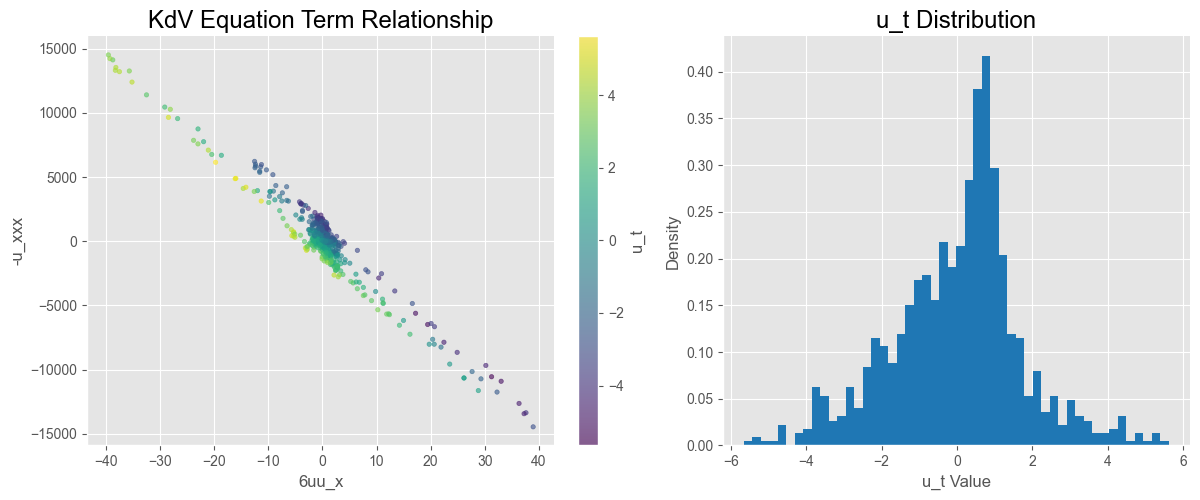

In [13]:
plot_equation_terms(
    model.metadata,
    terms={
        'x_term': {'vars': ['u', 'u_x'], 'label': '6uu_x'},
        'y_term': {'vars': ['u_xxx'], 'label': '-u_xxx'}
    },
    equation_name="KdV Equation",
)

#### 3.2 Metadata Plane Visualization (equation residuals on the x-t plane)


Interpolation info:
Source points shape: (961, 2)
Target grid shape: T=(512, 201), X=(512, 201)
Values shape: u_t=(961,), u=(961,)


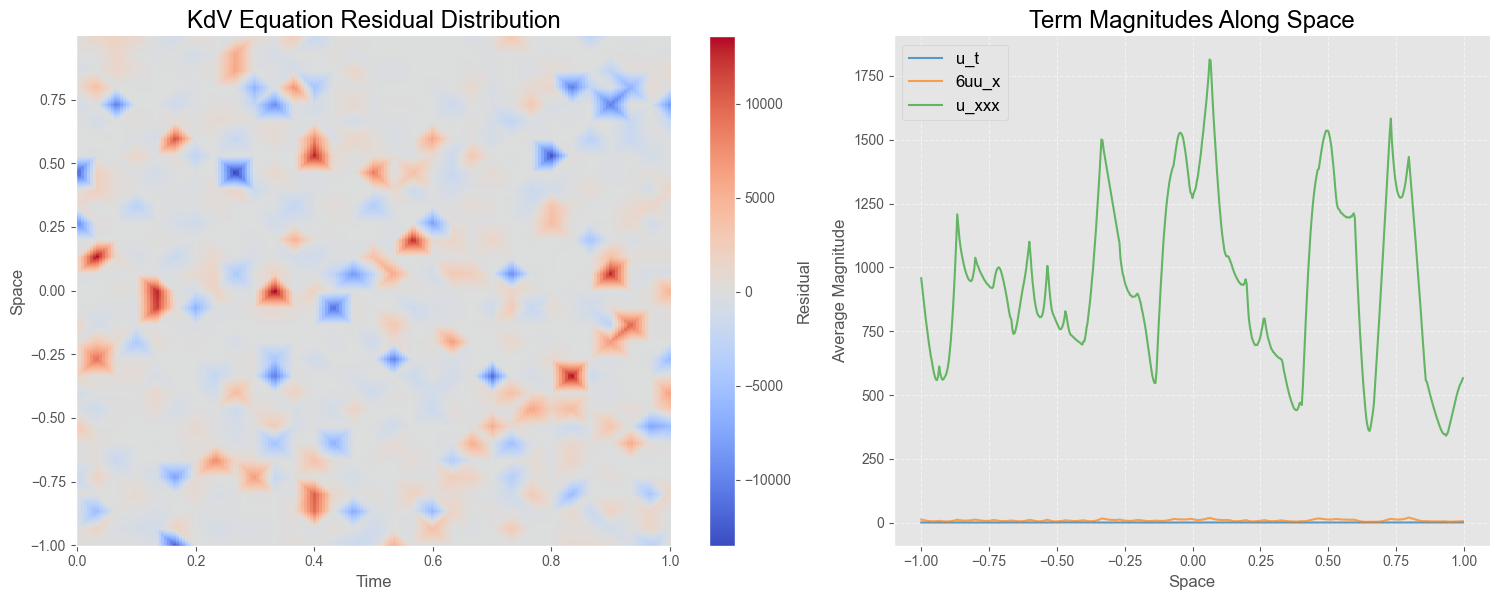


Metadata Plane Analysis:
Residual statistics:
  Mean: 6.9168e+01
  Std:  1.8452e+03
  Max:  1.3594e+04

Term magnitude statistics:
  u_t: 9.4391e-01
  6uu_x: 8.9294e+00
  u_xxx: 9.4357e+02


In [14]:
plot_metadata_plane(metadata=model.metadata, x=x, t=t)

#### 3.3 Derivative Relationships Visualization

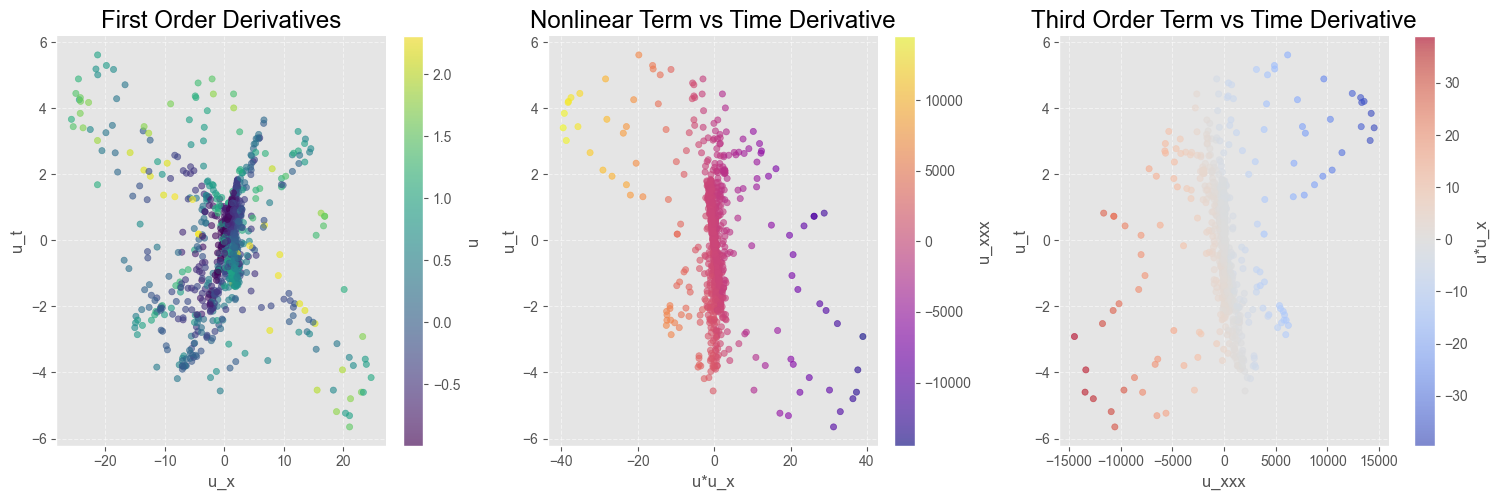

In [15]:
plot_derivative_relationships(metadata=model.metadata)